In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## Assumptions Made

Normalized data using annual SF population

## Dogpatch/Mission Bay/ Population Metrics

In [2]:
sf_pop = {'2020': 884363, '2019': 881549, '2018': 883305, '2017': 884363, '2016': 883305, '2015': 864816, 
          '2014': 852469,'2013': 837442, '2012': 825865, '2011': 812826, '2010': 805463, 
          '2009': 774347,'2008': 767067, '2007': 758348, '2006': 751431, '2005': 748846, 
          '2004': 750133,'2003': 757638, '2002': 755862, '2001': 777613, '2000': 777340}
year=[]
pop=[]
for key, val in sf_pop.items():
    year.append(int(key))
    pop.append(int(val))
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')

# SF Fire Department Calls EDA
**Results/Notes: Useful, proceed. Limit to Mission Bay & Dogpatch zipcodes**

In [3]:
fire_calls=pd.read_csv('DataSets/Stadium Impact/Fire_Department_Calls_for_Service.csv')
fire_calls.head()

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated
0,192042427,E38,19086811,Alarms,07/23/2019,07/23/2019,07/23/2019 03:10:08 PM,07/23/2019 03:11:38 PM,07/23/2019 03:11:44 PM,07/23/2019 03:13:19 PM,...,1.0,13.0,6.0,30.0,28858.0,27.0,9.0,NaN,NaN,NaN
1,191790072,T01,19076289,Alarms,06/28/2019,06/27/2019,06/28/2019 12:48:55 AM,06/28/2019 12:50:31 AM,06/28/2019 12:50:59 AM,06/28/2019 12:51:11 AM,...,9.0,14.0,10.0,36.0,28852.0,36.0,10.0,1.0,NaN,1.0
2,192634045,T07,19112815,Structure Fire,09/20/2019,09/20/2019,09/20/2019 08:36:21 PM,09/20/2019 08:36:21 PM,09/20/2019 08:36:30 PM,09/20/2019 08:37:30 PM,...,5.0,2.0,7.0,20.0,28859.0,19.0,4.0,NaN,NaN,NaN
3,181503580,KM01,18063623,Other,05/30/2018,05/30/2018,05/30/2018 08:01:18 PM,05/30/2018 08:01:18 PM,05/30/2018 08:04:24 PM,05/30/2018 08:04:55 PM,...,1.0,13.0,6.0,13.0,57.0,17.0,9.0,NaN,NaN,NaN
4,192322414,E05,19098703,Medical Incident,08/20/2019,08/20/2019,08/20/2019 02:23:23 PM,08/20/2019 02:24:40 PM,08/20/2019 02:25:01 PM,08/20/2019 02:25:53 PM,...,9.0,8.0,2.0,36.0,28853.0,36.0,2.0,1.0,1.0,1.0


In [4]:
fire_calls.loc[fire_calls['Address']=='4TH ST/CHANNEL ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='3RD ST/CHANNEL ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='CHANNEL ST/4TH ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='CHANNEL ST/3RD ST', 'Zipcode of Incident']=94158

In [5]:
#Cleaned up relevant addresses and zipcodes
fire_calls[fire_calls['Zipcode of Incident'].isnull()].groupby('Address').count().sort_values('Call Type', ascending=False).head(5)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated
Address,,,,,,,,,,,,,,,,,,,,,
CALL BOX: SF INTERNATIONAL AIRPORT,11063,11063,11063,11063,11063,11063,11063,11063,11063,2949,...,0,0,0,0,11063,0,0,0,0,0
CALL BOX:,745,745,745,745,745,745,745,745,745,652,...,57,0,0,0,738,0,0,0,0,0
JOHN MUIR DR/LAKE MERCED BL,295,295,295,295,295,295,295,295,295,275,...,0,0,0,0,295,0,0,0,0,0
"CALL BOX: MAIN ST/BAYSHORE BL,BN",187,187,187,187,187,187,187,187,187,167,...,0,0,0,0,187,0,0,0,0,0
"CALL BOX: INTERSTATE 80 EB/ALAMEDA COUN,SF",187,187,187,187,187,187,187,187,187,156,...,0,0,0,0,0,0,0,0,0,0


In [77]:
fire_calls['Zipcode of Incident'].nunique()

27

In [6]:
fire_calls['Call Date'] = pd.to_datetime(fire_calls['Call Date'])
min_date=fire_calls['Call Date'].min()
max_date=fire_calls['Call Date'].max()
print(f"min:{min_date}, max: {max_date}")

min:2000-04-12 00:00:00, max: 2020-03-27 00:00:00


In [7]:
#Adding Month & Year
import calendar
fire_calls['Call Month'] = fire_calls['Call Date'].transform(lambda x: x.month)
fire_calls['Call Year'] = fire_calls['Call Date'].transform(lambda x: x.year)
fire_calls['Month-Year'] = fire_calls['Call Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
fire_calls.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated,Call Month,Call Year,Month-Year
0,192042427,E38,19086811,Alarms,2019-07-23,07/23/2019,07/23/2019 03:10:08 PM,07/23/2019 03:11:38 PM,07/23/2019 03:11:44 PM,07/23/2019 03:13:19 PM,...,30.0,28858.0,27.0,9.0,NaN,NaN,NaN,7,2019,Jul 2019
1,191790072,T01,19076289,Alarms,2019-06-28,06/27/2019,06/28/2019 12:48:55 AM,06/28/2019 12:50:31 AM,06/28/2019 12:50:59 AM,06/28/2019 12:51:11 AM,...,36.0,28852.0,36.0,10.0,1.0,NaN,1.0,6,2019,Jun 2019
2,192634045,T07,19112815,Structure Fire,2019-09-20,09/20/2019,09/20/2019 08:36:21 PM,09/20/2019 08:36:21 PM,09/20/2019 08:36:30 PM,09/20/2019 08:37:30 PM,...,20.0,28859.0,19.0,4.0,NaN,NaN,NaN,9,2019,Sep 2019
3,181503580,KM01,18063623,Other,2018-05-30,05/30/2018,05/30/2018 08:01:18 PM,05/30/2018 08:01:18 PM,05/30/2018 08:04:24 PM,05/30/2018 08:04:55 PM,...,13.0,57.0,17.0,9.0,NaN,NaN,NaN,5,2018,May 2018
4,192322414,E05,19098703,Medical Incident,2019-08-20,08/20/2019,08/20/2019 02:23:23 PM,08/20/2019 02:24:40 PM,08/20/2019 02:25:01 PM,08/20/2019 02:25:53 PM,...,36.0,28853.0,36.0,2.0,1.0,1.0,1.0,8,2019,Aug 2019


In [8]:
fire_calls.sort_values('Call Date').groupby(['Call Year','Call Month']).count()['Call Date'].tail(20)

Call Year  Call Month
2018       8             25341
           9             24602
           10            26536
           11            26307
           12            26014
2019       1             24440
           2             24640
           3             26752
           4             25321
           5             25760
           6             27161
           7             25465
           8             27463
           9             28521
           10            29209
           11            26493
           12            28630
2020       1             27677
           2             26171
           3             22979
Name: Call Date, dtype: int64

In [9]:
fire_calls['Norm'] = 1

In [10]:
#normalizing the data:

for idx in range(0,len(sf_pop_df)):
    fire_calls.loc[fire_calls['Call Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

In [11]:
zipcodes_of_interest = ['94107','94103', '94158', '94105']
calltypes_of_interest = ['Marine Fire','Train / Rail Incident', 'Odor (Strange / Unknown)', 'Explosion','Traffic Collision','Alarms', 'Structure Fire', 'Other', 'Medical Incident']

In [12]:
mbdp_fire= fire_calls[['Call Type','Call Type Group','Call Date','Call Month','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm", 'Received DtTm']][(
    fire_calls['Zipcode of Incident'].isin(zipcodes_of_interest))&(
    fire_calls['Call Type'].isin(calltypes_of_interest))].sort_values('Call Date')

In [13]:
years = mbdp_fire['Call Year'].sort_values().unique()
months = mbdp_fire['Call Month'].sort_values().unique()
mbdp_fire.groupby(['Call Year','Call Month']).count()['Norm'].tail(20)

Call Year  Call Month
2018       8             4953
           9             5057
           10            4975
           11            4979
           12            5159
2019       1             4886
           2             5021
           3             5389
           4             5146
           5             5308
           6             5584
           7             5158
           8             5889
           9             5865
           10            5959
           11            5493
           12            6102
2020       1             5728
           2             5454
           3             4673
Name: Norm, dtype: int64

In [14]:
mbdp_fire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956419 entries, 3995802 to 3832454
Data columns (total 10 columns):
Call Type              956419 non-null object
Call Type Group        475377 non-null object
Call Date              956419 non-null datetime64[ns]
Call Month             956419 non-null int64
Call Year              956419 non-null int64
Month-Year             956419 non-null object
Address                956419 non-null object
Zipcode of Incident    956419 non-null float64
Norm                   956419 non-null float64
Received DtTm          956419 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 80.3+ MB


In [15]:
# fire_calls.to_csv('mbdp_normalized_fire_calls2.csv')
# mbdp_fire = pd.read_csv('mbdp_normalized_fire_calls2.csv')

In [16]:
mbdplt2019 = mbdp_fire[mbdp_fire['Call Year']<2020]
mbdplt2019.head()

,Call Type,Call Type Group,Call Date,Call Month,Call Year,Month-Year,Address,Zipcode of Incident,Norm,Received DtTm
3995802,Medical Incident,NaN,2000-04-12,4,2000,Apr 2000,0 Block of 6TH ST,94103.0,0.000001,04/12/2000 10:19:06 PM
3985042,Medical Incident,NaN,2000-04-12,4,2000,Apr 2000,4TH ST/CHANNEL ST,94158.0,0.000001,04/12/2000 09:27:45 PM
4012746,Medical Incident,NaN,2000-04-12,4,2000,Apr 2000,4TH ST/CHANNEL ST,94158.0,0.000001,04/12/2000 09:27:45 PM
3983832,Medical Incident,NaN,2000-04-12,4,2000,Apr 2000,9TH ST/MISSION ST,94103.0,0.000001,04/12/2000 10:05:41 PM
3986878,Medical Incident,NaN,2000-04-12,4,2000,Apr 2000,0 Block of SOUTH VAN NESS AVE,94103.0,0.000001,04/12/2000 10:43:54 PM


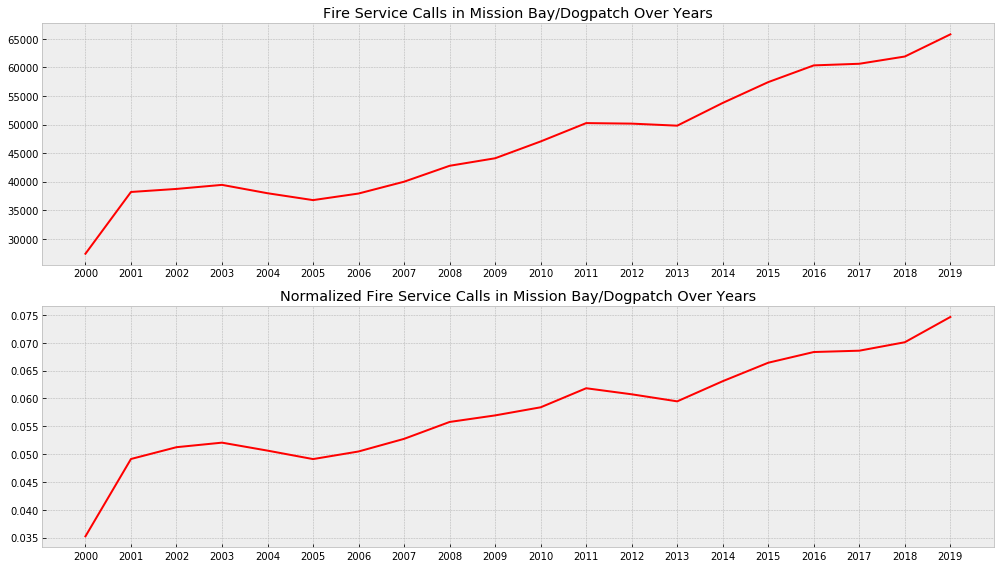

In [82]:
#Normalized Data by Population V2
mbdplt2019 = mbdp_fire[mbdp_fire['Call Year']<2020]

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdplt2019['Call Year'].unique(), mbdplt2019.sort_values('Call Year').groupby(['Call Year']).count()['Call Date'], color='red')
ax[0].set_xticks(mbdplt2019['Call Year'].unique())
ax[0].set_title('Fire Service Calls in Mission Bay/Dogpatch Over Years')
ax[1].plot(mbdplt2019['Call Year'].unique(), mbdplt2019.sort_values('Call Year').groupby('Call Year').sum()['Norm'], color='red')
ax[1].set_xticks(mbdplt2019['Call Year'].unique())
ax[1].set_title('Normalized Fire Service Calls in Mission Bay/Dogpatch Over Years')
plt.savefig('Graphs/Fire_Calls_2000-2020.png', dpi=300)
plt.tight_layout()
plt.show()


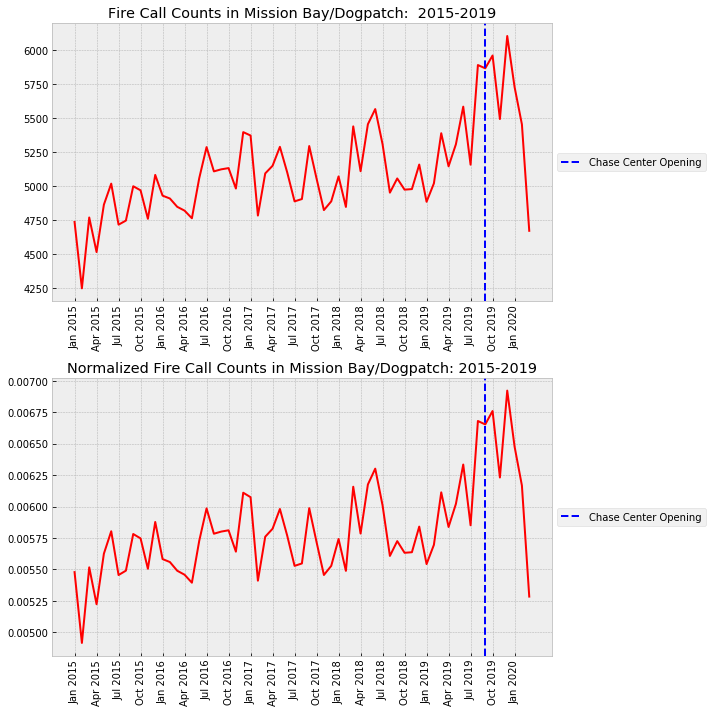

In [85]:
date_range = pd.date_range(start='2015-01-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)].sort_values('Call Date')
calls = mbdpjul19['Call Type'].unique()
labels = mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date']

fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date'], color='red')
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Fire Call Counts in Mission Bay/Dogpatch:  2015-2019')
ax[0].set_xticks(mbdpjul19['Month-Year'].unique()[::3])
ax[0].set_xticklabels(mbdpjul19['Month-Year'].unique()[::3], rotation='vertical')
ax[0].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax[1].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).sum()['Norm'], color='red')
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in Mission Bay/Dogpatch: 2015-2019')
ax[1].set_xticks(mbdpjul19['Month-Year'].unique()[::3])
ax[1].set_xticklabels(mbdpjul19['Month-Year'].unique()[::3], rotation='vertical')
ax[1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
# plt.savefig('Graphs/FireCalls2015-2020.png', dpi=300)

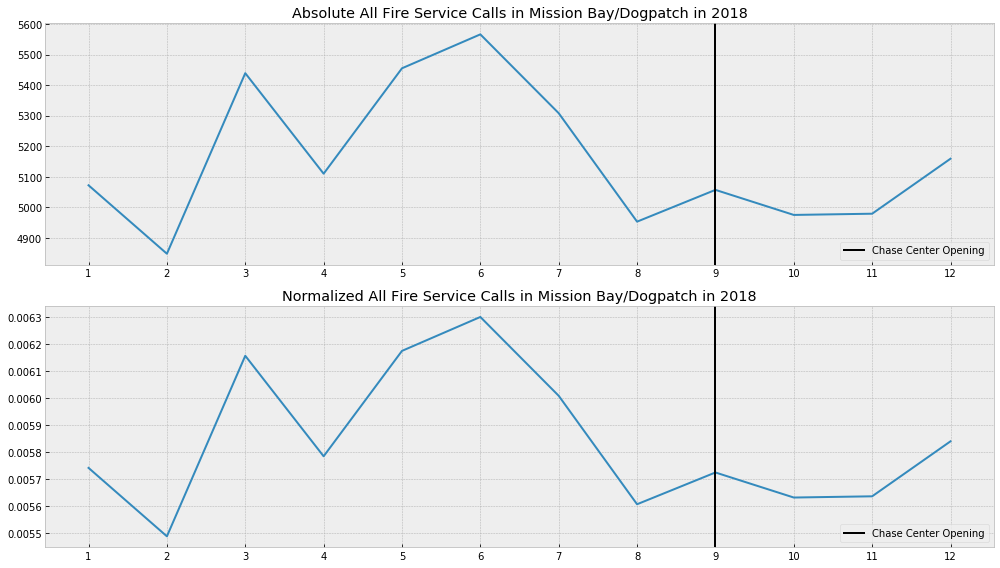

In [19]:
df = mbdp_fire[['Call Type','Call Type Group','Call Date','Call Month','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm"]][(
    mbdp_fire['Zipcode of Incident'].isin(zipcodes_of_interest))].sort_values('Call Date')
mbdp2019 = df[df['Call Year'] == 2018].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').count()['Norm'])
ax[0].axvline(9,color='black',label='Chase Center Opening')
ax[0].set_xticks(mbdp2019['Call Month'].unique())
ax[0].set_title('Absolute All Fire Service Calls in Mission Bay/Dogpatch in 2018')
ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').sum()['Norm'])
ax[1].axvline(9,color='black',label='Chase Center Opening')
ax[1].set_xticks(mbdp2019['Call Month'].unique())
ax[1].set_title('Normalized All Fire Service Calls in Mission Bay/Dogpatch in 2018')
ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2018allfirecalls.png',dpi=300)
plt.show()

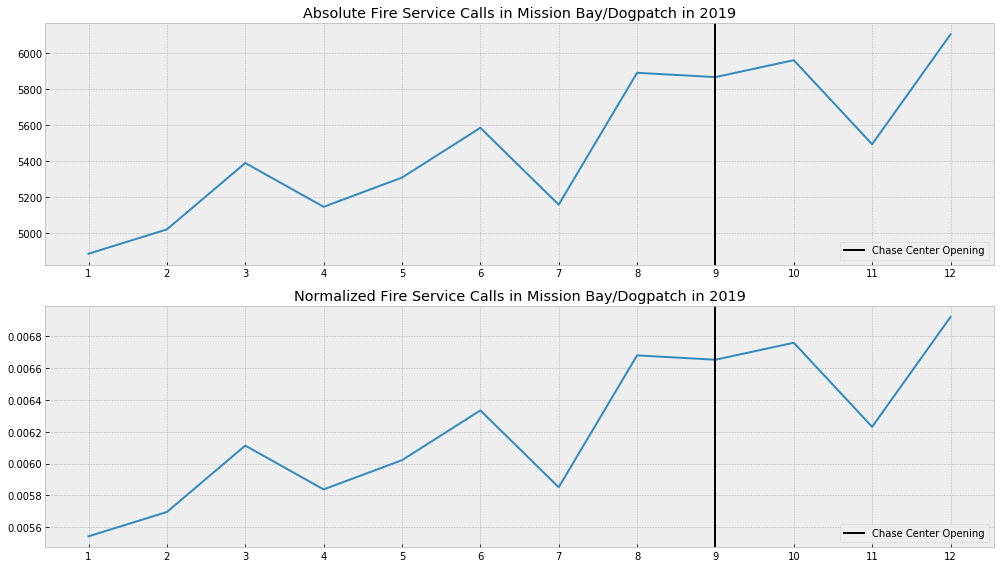

In [20]:
df = mbdp_fire[['Call Type','Call Type Group','Call Date','Call Month','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm"]][(
    mbdp_fire['Zipcode of Incident'].isin(zipcodes_of_interest))].sort_values('Call Date')
mbdp2019 = df[df['Call Year'] == 2019].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').count()['Norm'])
ax[0].axvline(9,color='black',label='Chase Center Opening')
ax[0].set_xticks(mbdp2019['Call Month'].unique())
ax[0].set_title('Absolute Fire Service Calls in Mission Bay/Dogpatch in 2019')
ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').sum()['Norm'])
ax[1].axvline(9,color='black',label='Chase Center Opening')
ax[1].set_xticks(mbdp2019['Call Month'].unique())
ax[1].set_title('Normalized Fire Service Calls in Mission Bay/Dogpatch in 2019')
ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2019allfirecalls.png',dpi=300)
plt.show()

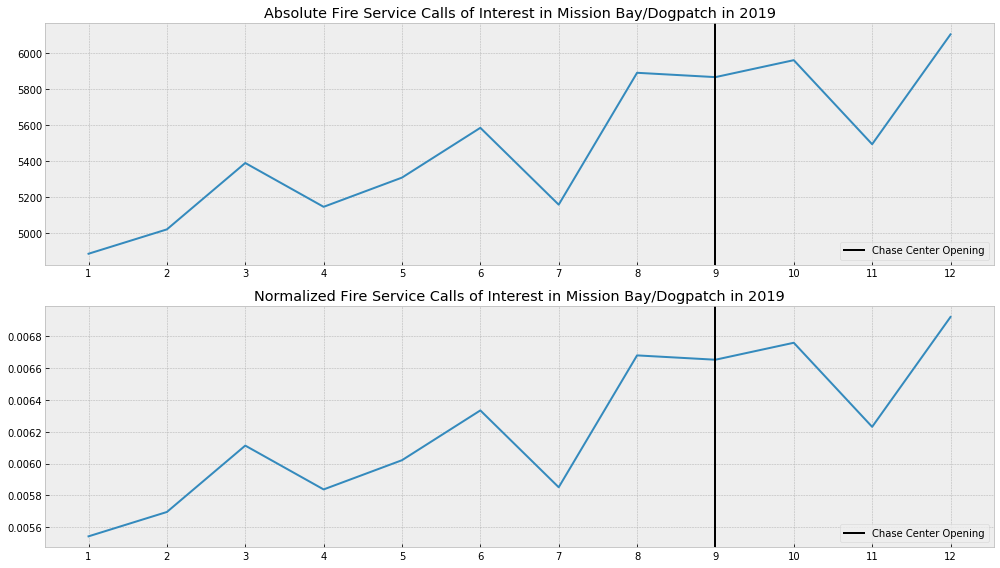

In [21]:
#Only looking at categories in "Calls of interest"
mbdp2019 = mbdp_fire[mbdp_fire['Call Year'] == 2019].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').count()['Norm'])
ax[0].axvline(9,color='black',label='Chase Center Opening')
ax[0].set_xticks(mbdp2019['Call Month'].unique())
ax[0].set_title('Absolute Fire Service Calls of Interest in Mission Bay/Dogpatch in 2019')
ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').sum()['Norm'])
ax[1].axvline(9,color='black',label='Chase Center Opening')
ax[1].set_xticks(mbdp2019['Call Month'].unique())
ax[1].set_title('Normalized Fire Service Calls of Interest in Mission Bay/Dogpatch in 2019')
ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2019firecallsofinterest.png',dpi=300)
plt.show()

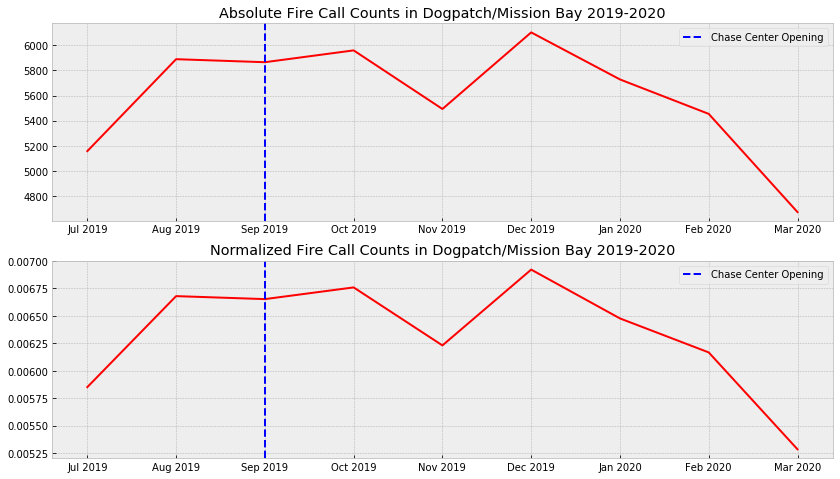

In [80]:
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)].sort_values('Call Date')
calls = mbdpjul19['Call Type'].unique()
labels = mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date']

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date'], color='red')
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Absolute Fire Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[0].set_xticks(mbdpjul19['Month-Year'].unique())
ax[0].legend(loc='best')
ax[1].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).sum()['Norm'], color='red')
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[1].set_xticks(mbdpjul19['Month-Year'].unique())
ax[1].legend(loc='best')
plt.savefig('Graphs/FireCallsinmbdp2019-2020.png',dpi=300)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


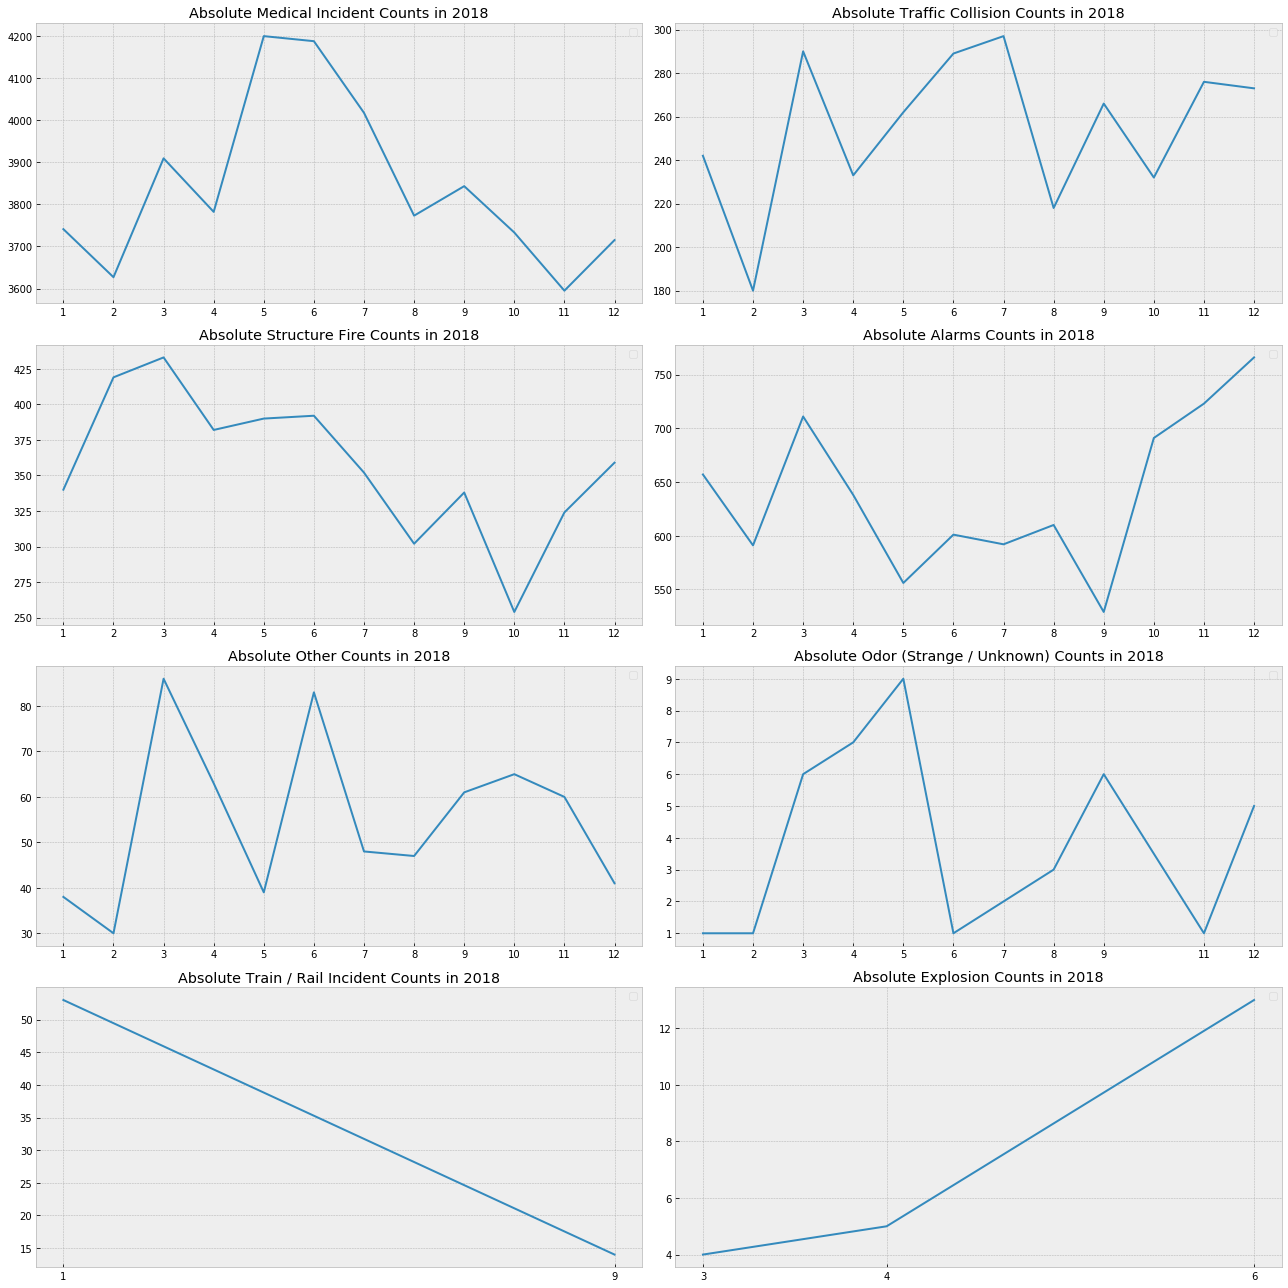

In [23]:
#Absolute
date_range = pd.date_range(start='2018-01-01', end='2018-12-31')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Call Month'].unique(),graph.groupby(['Call Year','Call Month']).count()['Call Date'])
#     ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Absolute {calls[ix]} Counts in 2018')
    ax.set_xticks(graph['Call Month'].unique())
    ax.legend(loc='best')
    plt.tight_layout()

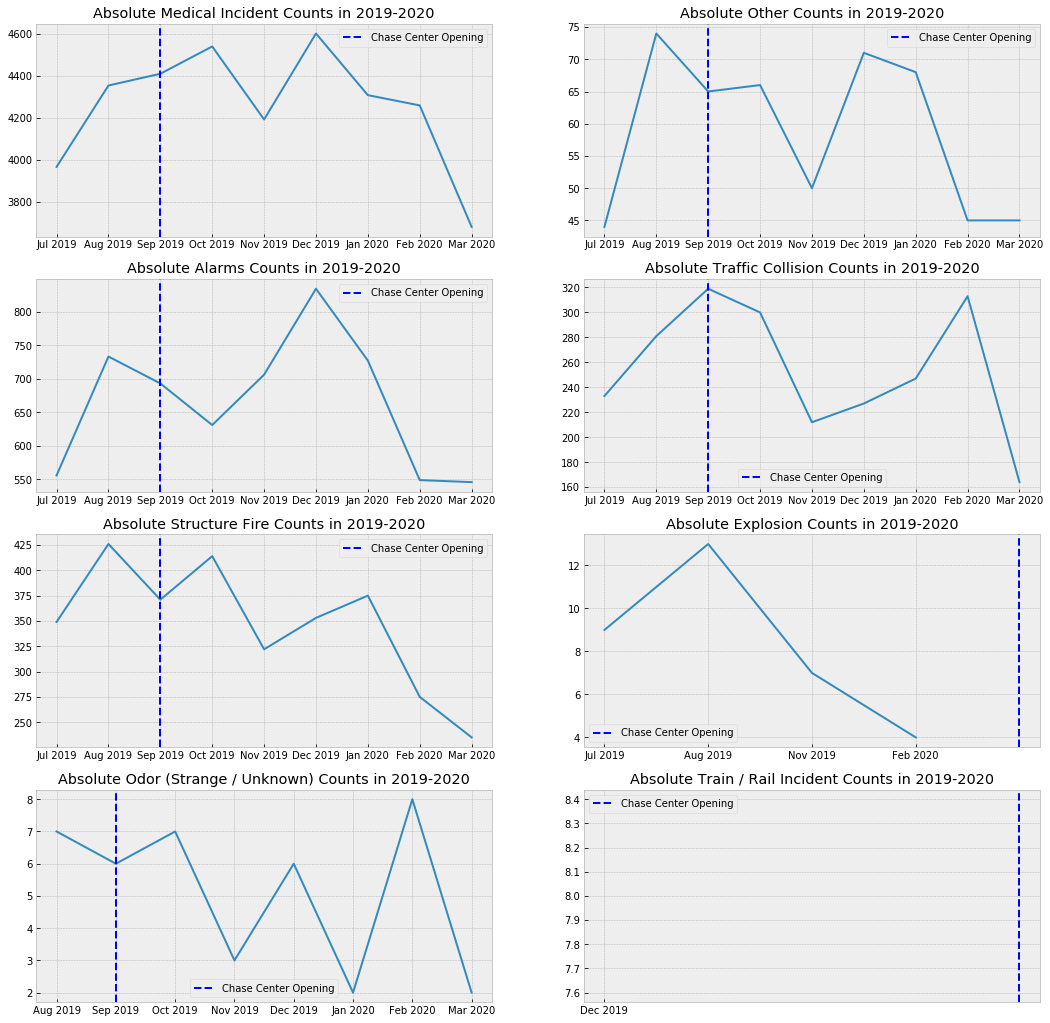

In [24]:
#Absolute
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Month-Year'].unique(),graph.groupby(['Call Year','Call Month']).count()['Call Date'])
    ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Absolute {calls[ix]} Counts in 2019-2020')
    ax.set_xticks(graph['Month-Year'].unique())
    ax.legend(loc='best')

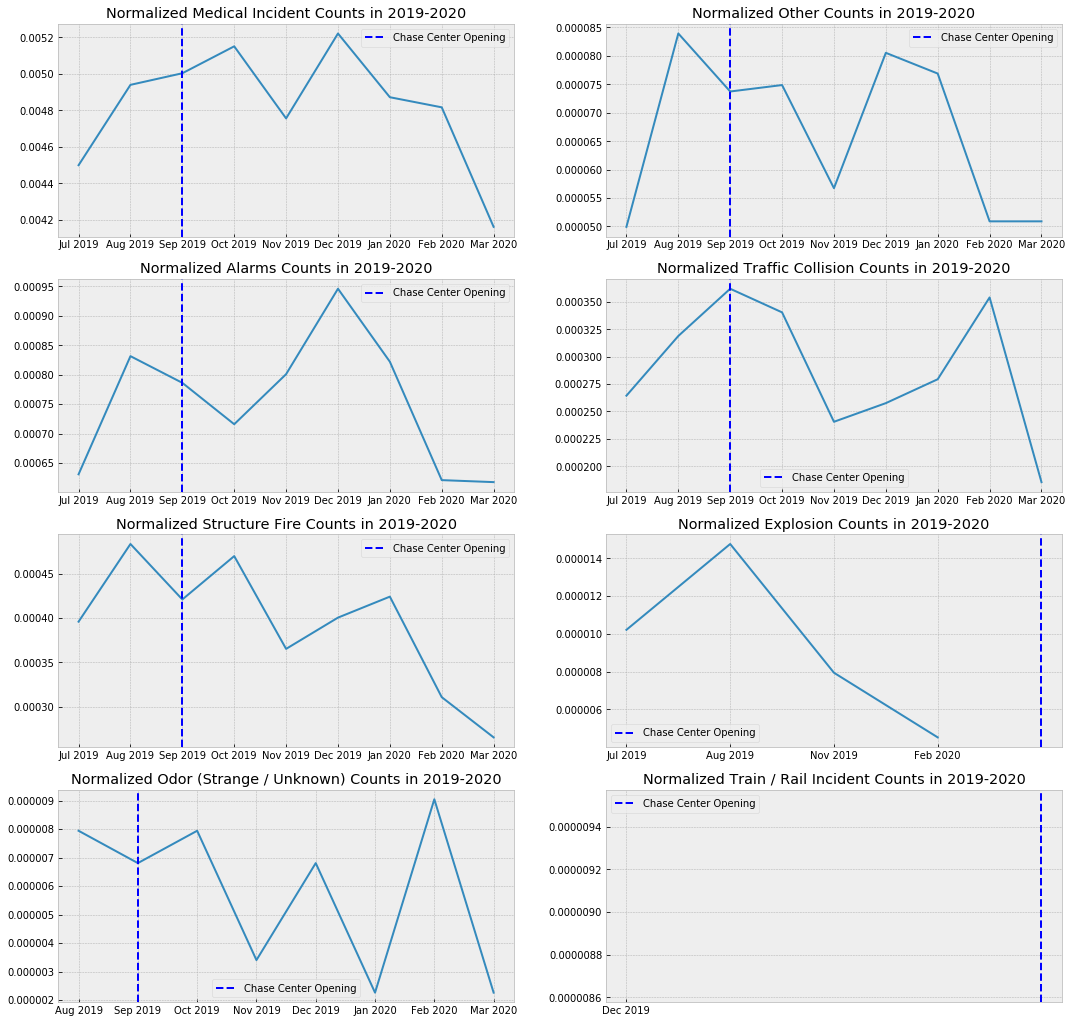

In [25]:
#Normalized, cannot sort by 
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Month-Year'].unique(),graph.groupby(['Call Year','Call Month']).sum()['Norm'])
    ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Normalized {calls[ix]} Counts in 2019-2020')
    ax.set_xticks(graph['Month-Year'].unique())
    ax.legend(loc='best')


/Users/sherryduong/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


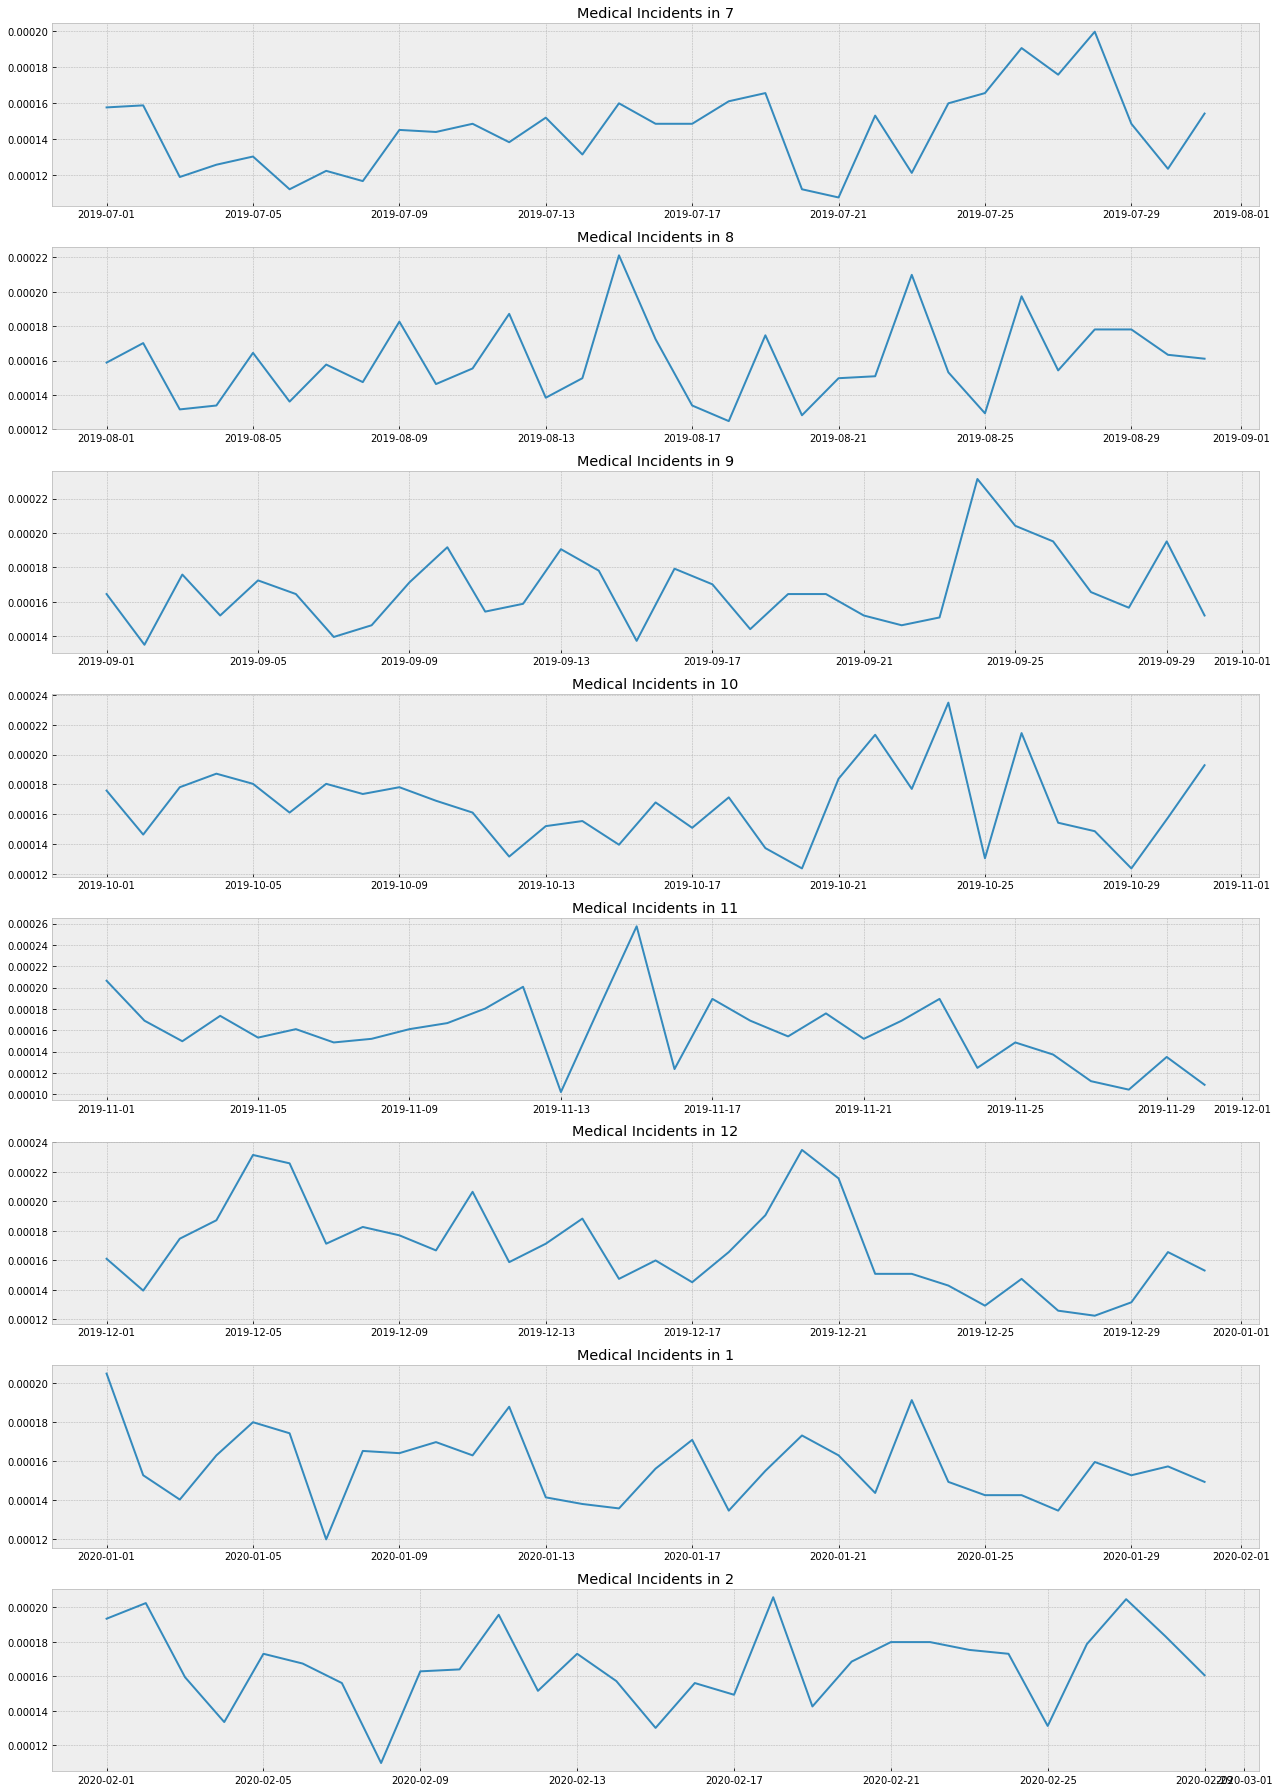

In [26]:
#Next step: Subplots per month for key indicators of interest: Medical Incidents, Alarms, Traffic Collisons
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
months = [7,8,9,10,11,12,1,2]
calls = ['Medical Incidents', 'Traffic Collisons']

fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month']==months[ix]) & (mbdpjul19['Call Type']=='Medical Incident')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').sum()['Norm'])
    ax.set_title(f'Medical Incidents in {months[ix]}')
fig.tight_layout()

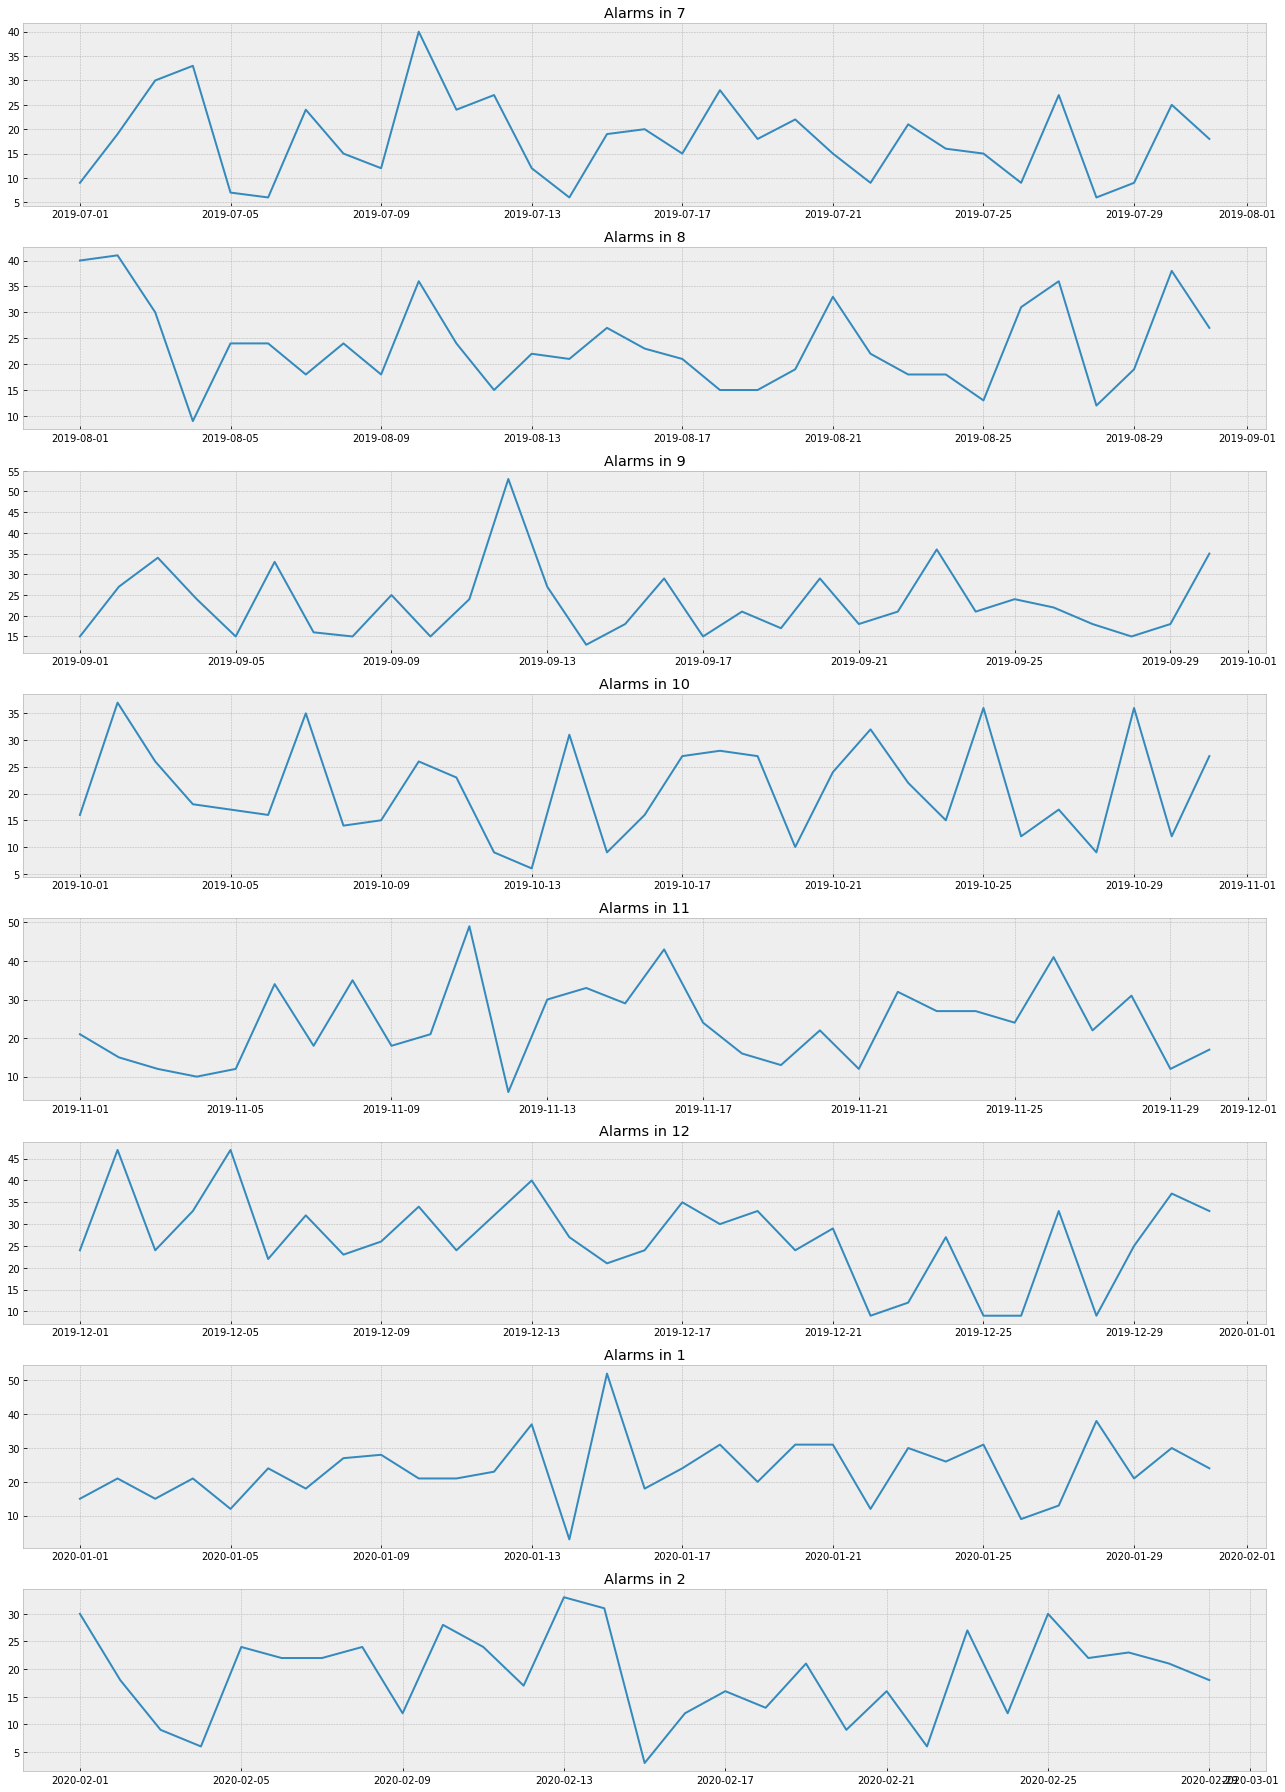

In [27]:
fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month']==months[ix]) & (mbdpjul19['Call Type']=='Alarms')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').count()['Call Month'])
    ax.set_title(f'Alarms in {months[ix]}')
fig.tight_layout()

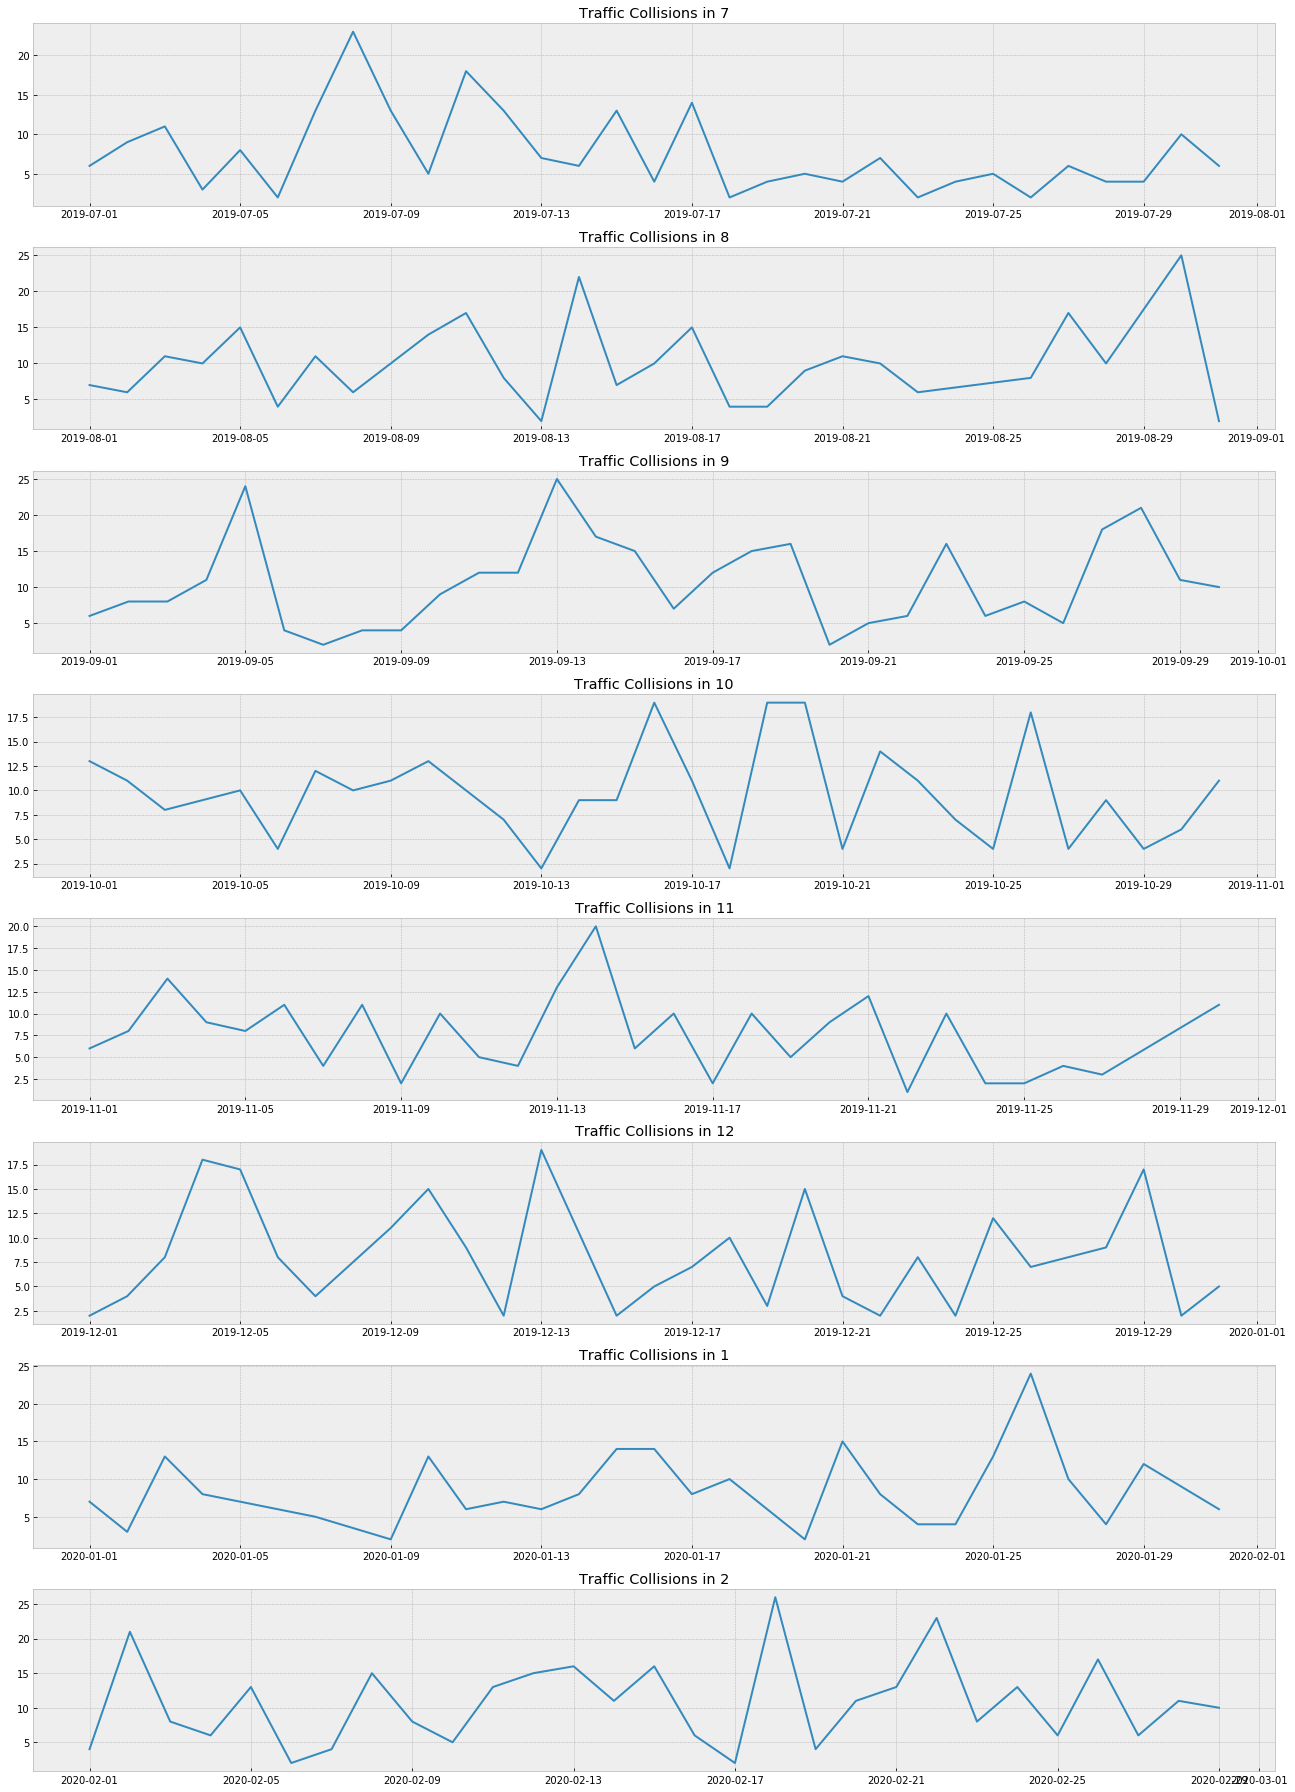

In [28]:
fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month']==months[ix]) & (mbdpjul19['Call Type']=='Traffic Collision')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').count()['Call Month'])
    ax.set_title(f'Traffic Collisions in {months[ix]}')
fig.tight_layout()

## Takeaways
Per month, fire services are sporatic, averaging X per month. We will look specifically at Medical Incidents, Alarms, and Traffic Collisions.

**Hypothesis Testing:** 

Null Hypothesis: Average per capita rate of fire service calls on game days will be the same as non-game days

Alternative Hypothesis: Average per capita rate of fire service calls on game days will be higher than non-game days

**Test Method 1: Non-Parametric**

**Test Method 2: Sample Means should follow normal distribution**

Question: Should comparison be after opening, or before opening?

In [87]:
#Import chase event dates
chase_events=pd.read_csv('Chase_Stadium_Events')
chase_events = chase_events.rename(columns = {'date':'Call Date'})
chase_events['Call Date'] = pd.to_datetime(chase_events['Call Date'])
event_dates = chase_events['Call Date'].unique()
chase_events =chase_events[['Call Date','fields.type']]
chase_events['Day of Week'] = chase_events['Call Date'].transform(lambda x: x.dayofweek)
chase_events.groupby('Day of Week').count()['Call Date']

Day of Week
0    10
1     9
2    10
3    12
4     9
5    20
6     7
Name: Call Date, dtype: int64

In [88]:
#Only looking at categories in "Calls of interest"
date_range = pd.date_range(start='2019-09-01', end='2020-03-31')
mbdp2020 = mbdp_fire[(mbdp_fire['Call Date'].isin(date_range))].sort_values('Call Date')
events2020 = mbdp2020[mbdp2020['Call Date'].isin(event_dates)]
notevents2020 = mbdp2020[~mbdp2020['Call Date'].isin(event_dates)]
events2020 = pd.merge(chase_events, events2020, on='Call Date', how='left')
eventdays = len(events2020['Call Date'].unique())
noteventdays = len(notevents2020['Call Date'].unique())
print(f'Number of Event Dates: {eventdays} Number of Non-Event Dates: {noteventdays}')
print(f'Incidents on Event Dates: {len(events2020)}, Incidents not on Event Dates: {len(notevents2020)}')

Number of Event Dates: 75 Number of Non-Event Dates: 134
Incidents on Event Dates: 14919, Incidents not on Event Dates: 24776


In [89]:
events_group = events2020.groupby(['Call Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Call Date'].unique())
sd_events = np.std(events2020.groupby('Call Date').count()['Norm'])
print(f'Event Dates at Chase Stadium have on average {mean_events} Fire Calls per day, {sd_events} SD')

Event Dates at Chase Stadium have on average 198.92 Fire Calls per day, 49.81318700906417 SD


In [90]:
notevents_group = notevents2020.groupby('Call Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Call Date'].unique())
sd_not_events = np.std(notevents_group)
se_not_events = sd_not_events/(len(notevents2020['Call Date'].unique())**0.5) #using SD sample to estimate pop
notevents_dist = stats.norm(mean_not_events,se_not_events)
print(f'Non-Event Dates at Chase Stadium have on average {round(mean_not_events,3)} Fire Calls per day, {round(sd_not_events,3)} SD, {round(se_not_events,3)} SE')

Non-Event Dates at Chase Stadium have on average 184.896 Fire Calls per day, 27.532 SD, 2.378 SE


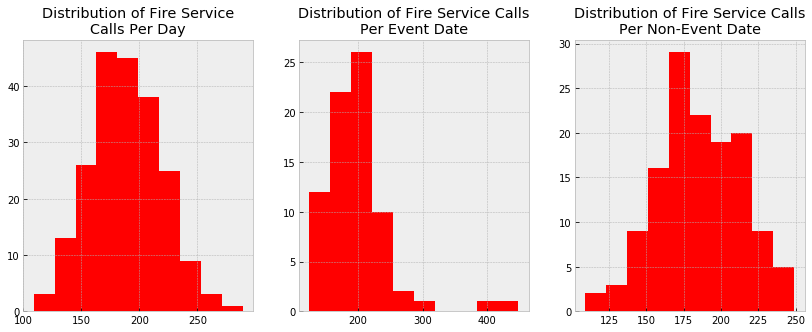

In [91]:
grouped = mbdp2020.groupby('Call Date').count()['Norm']
fig, ax = plt.subplots(1,3, figsize=(14,5))
ax[0].hist(grouped,bins=10, color='red')
ax[0].set_title('Distribution of Fire Service\nCalls Per Day')
ax[1].hist(events_group,bins=10,color='red')
ax[1].set_title('Distribution of Fire Service Calls\nPer Event Date')
ax[2].hist(notevents_group,bins=10,color='red')
ax[2].set_title('Distribution of Fire Service Calls\nPer Non-Event Date')
plt.tight_layout
plt.savefig('graphs/firecallsdistribution.png', dpi=300)

In [92]:
stats.mannwhitneyu(events_group, notevents_group, alternative="greater")
#Based on the Mannwhitney Test Result, events at the Chase Stadium due have higher Fire Service Calls in Dogpatch

MannwhitneyuResult(statistic=5770.0, pvalue=0.03790987564603979)

In [93]:
stats.ttest_ind(notevents_group, events_group, equal_var = False) 
#T-test P-Val

Ttest_indResult(statistic=-2.239093154871442, pvalue=0.027372333950134473)

## With the high SD, it looks like there could be outliers in the distribution

[Text(0, 0, 'Events_group'), Text(0, 0, 'notevents_group')]

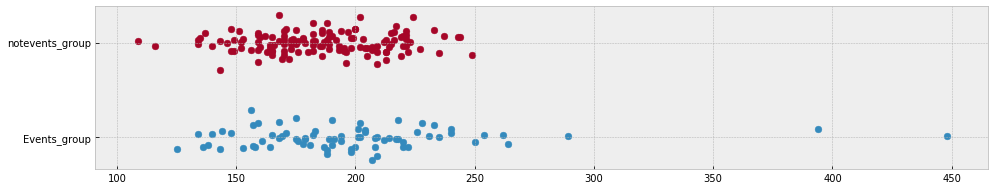

In [94]:
#Let's look into those outliers for CLT
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(events_group, np.repeat(0, len(events_group)) + np.random.normal(0, 0.1, len(events_group)), s=45)
ax.scatter(notevents_group, np.repeat(1, len(notevents_group)) + np.random.normal(0, 0.1, len(notevents_group)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonScatter_fire.png',dpi=300)

Text(0.5, 1.0, 'Distribution of Fire Department Calls on Non-Event & Event Dates')

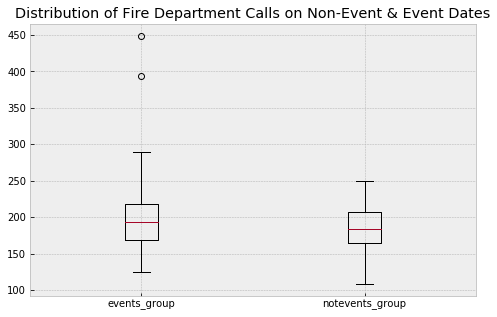

In [95]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([events_group, notevents_group])
ax.set_xticks([1,2])
ax.set_xticklabels(["events_group", "notevents_group"])
ax.set_title('Distribution of Fire Department Calls on Non-Event & Event Dates')
# plt.savefig('Graphs/EventsVsNonBox_fire.png',dpi=300)

## Removing the Outliers
Note: 12/21/2019 & 1/11/2020 high counts of X....XXX If more time, I would look into these events more. Would also look into times of events.

In [96]:
events2020.groupby('Call Date').count()['Norm'].sort_values(ascending=False)

Call Date
2019-12-21    448
2020-01-11    394
2019-12-05    289
2019-11-15    264
2020-03-05    262
             ... 
2019-12-28    140
2020-01-14    138
2020-02-08    136
2019-11-29    134
2019-11-27    125
Name: Norm, Length: 75, dtype: int64

In [97]:
#Removing 2 outliers from events
outlier_dates = ['2019-12-21', '2020-01-11']
new_events2020 = events2020[~events2020['Call Date'].isin(outlier_dates)]
new_events_group = new_events2020.groupby(['Call Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Call Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Call Date').count()['Norm'])
se_events_new = sd_events_new/(len(new_events_group)**0.5)
new_events_dist = stats.norm(mean_events_new, se_events_new)#standard_error
print(f'Event Dates at Chase Stadium have on average {mean_events_new} Fire Calls per day, {se_events_new} SE')

Event Dates at Chase Stadium have on average 192.83561643835617 Fire Calls per day, 3.953711041499308 SE


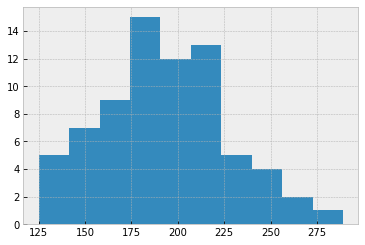

In [42]:
new_events_group.hist()
#also follows normal-ish distribution

In [98]:
#Redo the mannwhitneyU without outliers, MannWhitneyUResult now indicates insignificant
stats.mannwhitneyu(new_events_group, notevents_group, alternative="greater")

MannwhitneyuResult(statistic=5502.0, pvalue=0.0690632097788563)

In [99]:
T_test_Pval_two_tail = stats.ttest_ind(new_events_group, notevents_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
T_test_Pval
#T-test P-Val

0.04483397094268829

In [100]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(new_events_group, notevents_group)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 1.72


In [101]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(new_events_group, notevents_group)
df

124.69733256624467

Text(0.5, 1.0, "Welch's Distribution Given Events & Non Event Date Fire Department Calls are Equal")

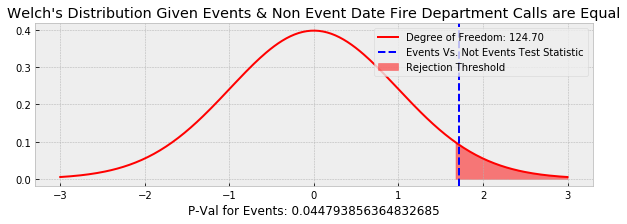

In [104]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(10, 3))
notevents_dist = stats.t(df)
p_val = (1-notevents_dist.cdf(test_statistic-0.01))
critical_val = notevents_dist.ppf(0.95)
ax.plot(x, notevents_dist.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df), color='red')
ax.fill_between(x, notevents_dist.pdf(x), where=(x >= critical_val), color="red", alpha=0.5, label='Rejection Threshold')
ax.axvline(test_statistic, color='blue', ls='--', label='Events Vs. Not Events Test Statistic')
ax.set_xlabel(f'P-Val for Events: {p_val}')
ax.legend(loc='upper right')
ax.set_title("Welch's Distribution Given Events & Non Event Date Fire Department Calls are Equal")
# plt.savefig('graphs/EventsVsNonHypotheisTest_Fire.png')

## Could it be due to Saturdays?

In [66]:
new_events2020['Day of Week'] = new_events2020['Call Date'].transform(lambda x: x.dayofweek)
notevents2020['Day of Week'] = notevents2020['Call Date'].transform(lambda x: x.dayofweek)
new_events2020['Norm'] = 1/len(new_events2020)
notevents2020['Norm'] = 1/len(notevents2020)
# print(new_events2020.groupby('Day of Week').sum()['Norm'],notevents2020.groupby('Day of Week').sum()['Norm'])

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

## What About Shelter In Place 3/19/2020+?

In [105]:
date_range = pd.date_range(start='2019-09-01', end='2020-03-19')
mbdp2020 = mbdp_fire[(mbdp_fire['Call Date'].isin(date_range))].sort_values('Call Date')
events2020 = mbdp2020[mbdp2020['Call Date'].isin(event_dates)]
notevents2020 = mbdp2020[~mbdp2020['Call Date'].isin(event_dates)]
events2020 = pd.merge(chase_events, events2020, on='Call Date', how='left')
events2020[events2020['Call Date'].isin(['2019-12-21', 
                                         '2020-01-11'])].groupby(['Call Date', 'Call Type','Call Type Group', 
                                                                  'Received DtTm']).count().sort_values('Call Month',ascending=False)

fields.type  \
Call Date  Call Type        Call Type Group              Received DtTm                         
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM           28   
                                                         01/11/2020 07:33:10 PM           20   
2019-12-21 Medical Incident Non Life-threatening         12/21/2019 04:39:07 PM           12   
                            Potentially Life-Threatening 12/21/2019 11:23:46 PM           10   
                                                         12/21/2019 09:15:02 PM           10   
...                                                                                      ...   
2020-01-11 Medical Incident Non Life-threatening         01/11/2020 04:08:53 PM            2   
                                                         01/11/2020 03:18:06 PM            2   
                                                         01/11/2020 02:28:49 PM            2   
                                                         01/11/2020 01:41:47 PM            2   
                                                         01/11/2020 12:52:32 AM            2   

                                                                                 Day of Week  \
Call Date  Call Type        Call Type Group              Received DtTm                         
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM           28   
                                                         01/11/2020 07:33:10 PM           20   
2019-12-21 Medical Incident Non Life-threatening         12/21/2019 04:39:07 PM           12   
                            Potentially Life-Threatening 12/21/2019 11:23:46 PM           10   
                                                         12/21/2019 09:15:02 PM           10   
...                                                                                      ...   
2020-01-11 Medical Incident Non Life-threatening         01/11/2020 04:08:53 PM            2   
                                                         01/11/2020 03:18:06 PM            2   
                                                         01/11/2020 02:28:49 PM            2   
                                                         01/11/2020 01:41:47 PM            2   
                                                         01/11/2020 12:52:32 AM            2   

                                                                                 Call Month  \
Call Date  Call Type        Call Type Group              Received DtTm                        
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM          28   
                                                         01/11/2020 07:33:10 PM          20   
2019-12-21 Medical Incident Non Life-threatening         12/21/2019 04:39:07 PM          12   
                            Potentially Life-Threatening 12/21/2019 11:23:46 PM          10   
                                                         12/21/2019 09:15:02 PM          10   
...                                                                                     ...   
2020-01-11 Medical Incident Non Life-threatening         01/11/2020 04:08:53 PM           2   
                                                         01/11/2020 03:18:06 PM           2   
                                                         01/11/2020 02:28:49 PM           2   
                                                         01/11/2020 01:41:47 PM           2   
                                                         01/11/2020 12:52:32 AM           2   

                                                                                 Call Year  \
Call Date  Call Type        Call Type Group              Received DtTm                       
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM         28   
                                                         01/11/20

In [106]:
events_group = events2020.groupby(['Call Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Call Date'].unique())
sd_events = np.std(events2020.groupby('Call Date').count()['Norm'])
notevents_group = notevents2020.groupby('Call Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Call Date'].unique())
sd_not_events = np.std(notevents_group)
se_not_events = sd_not_events/(len(notevents2020['Call Date'].unique())**0.5) #using SD sample to estimate pop
notevents_dist = stats.norm(mean_not_events,se_not_events)
outlier_dates = ['2019-12-21', '2020-01-11']
new_events2020 = events2020[~events2020['Call Date'].isin(outlier_dates)]
new_events_group = new_events2020.groupby(['Call Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Call Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Call Date').count()['Norm'])
se_events_new = sd_events_new/(len(new_events_group)**0.5)
new_events_dist = stats.norm(mean_events_new, se_events_new)#standard_error

In [107]:
stats.mannwhitneyu(new_events_group, notevents_group, alternative="greater")

MannwhitneyuResult(statistic=5004.0, pvalue=0.15074433900600526)

In [108]:
T_test_Pval_two_tail = stats.ttest_ind(new_events_group, notevents_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
T_test_Pval

0.11199080102642549

Text(0.5, 1.0, "Welch's Distribution Given Events & Non Event Date Fire Department Calls are Equal\nWithout SIP")

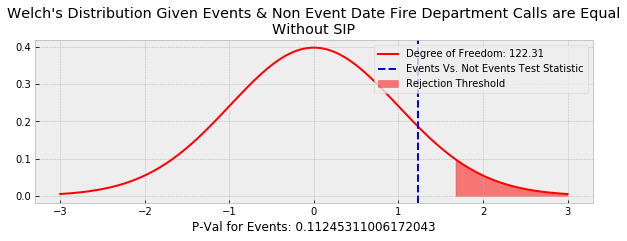

In [111]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(new_events_group, notevents_group)
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(new_events_group, notevents_group)
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(10, 3))
notevents_dist = stats.t(df)
p_val = (1-notevents_dist.cdf(test_statistic-0.01))
critical_val = notevents_dist.ppf(0.95)
ax.plot(x, notevents_dist.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df),color='red')
ax.fill_between(x, notevents_dist.pdf(x), where=(x >= critical_val), color="red", alpha=0.5, label='Rejection Threshold')
ax.axvline(test_statistic, color='blue', ls='--', label='Events Vs. Not Events Test Statistic')
ax.set_xlabel(f'P-Val for Events: {p_val}')
ax.legend(loc='upper right')
ax.set_title("Welch's Distribution Given Events & Non Event Date Fire Department Calls are Equal\nWithout SIP")
# plt.savefig('graphs/EventsVsNonHypotheisTest_FireWOSIP.png')

## Shelter In Place has helped to bring the crime rate down for Non-Event Dates, making the difference between Event & Non-Event Dates seem bigger than it is.

## What about concert versus basketball?

In [55]:
chase_events.tail()

,Call Date,fields.type,Day of Week
72,2019-09-16,cce,0
73,2019-09-13,cce,4
74,2019-09-15,cce,6
75,2019-09-11,cce,2
76,2019-09-06,cce,4


In [56]:
bball_dates = chase_events[chase_events['fields.type']=='gsw']['Call Date'].unique()
concert_dates = chase_events[chase_events['fields.type']=='cce']['Call Date'].unique()
bball_events = new_events2020[new_events2020['Call Date'].isin(bball_dates)]
concert_events = new_events2020[new_events2020['Call Date'].isin(concert_dates)]

In [57]:
bball_group = bball_events.groupby('Call Date').count()['Norm']
concert_group = concert_events.groupby('Call Date').count()['Norm']
bball_mean = np.mean(bball_group)
bball_sd = np.std(bball_group)
bball_se = bball_sd/(np.sqrt(len(bball_group)))
concert_mean = np.mean(concert_group)
concert_sd = np.std(concert_group)
concert_se = concert_sd/np.sqrt(len(concert_group))
print(f'Bball Mean: {bball_mean}, Concert Mean: {concert_mean}')
print(f'Bball sd: {bball_sd}, Concert sd: {concert_sd}')
print(f'Bball se: {bball_se}, Concert Mean: {concert_se}')

Bball Mean: 187.97297297297297, Concert Mean: 197.83333333333334
Bball sd: 34.115453014794845, Concert sd: 32.6874933609511
Bball se: 5.608545927095771, Concert Mean: 5.447915560158517


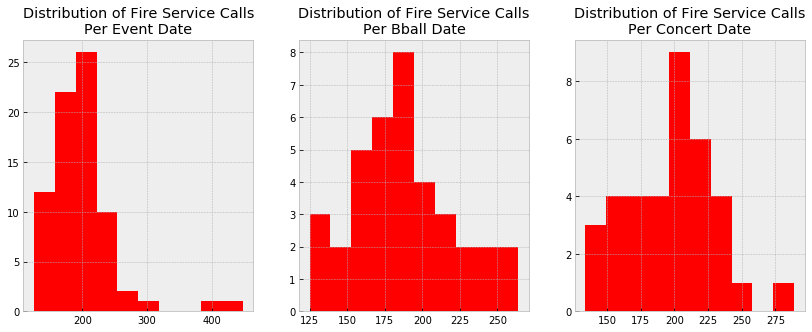

In [113]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
ax[0].hist(events_group,bins=10,color='red')
ax[0].set_title('Distribution of Fire Service Calls\nPer Event Date')
ax[1].hist(bball_group,bins=10,color='red')
ax[1].set_title('Distribution of Fire Service Calls\nPer Bball Date')
ax[2].hist(concert_group,bins=10,color='red')
ax[2].set_title('Distribution of Fire Service Calls\nPer Concert Date')
plt.tight_layout
plt.savefig('graphs/firecallsbballconcertdist.png', dpi=300)

In [59]:
stats.mannwhitneyu(concert_group, bball_group, alternative="greater")

MannwhitneyuResult(statistic=794.5, pvalue=0.0789024636859117)

In [60]:
T_test_Pval_two_tail = stats.ttest_ind(concert_group, bball_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
print(f'The P-Val for Concert to Bball Events is: {T_test_Pval}')

The P-Val for Concert to Bball Events is: 0.10885125140300968
